In [21]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/MATC_Projects.csv'
df1 = pd.read_csv(url)
df1.head()

,id,title,author_name,mathworks_url,summary,content,category,author_uri,published,updated,no_of_comments,no_of_ratings,average_rating,downloads,download_link,license,model_files,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,https://www.mathworks.com/matlabcentral/fileex...,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,https://www.mathworks.com/matlabcentral/profil...,2001-07-23 12:51:25.000000,2001-07-23 12:51:25.000000,18,46,4,3,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, Jackson Harvey\nAll rights...","RF.mdl,",1
1,266,smxl,Giampiero Campa,https://www.mathworks.com/matlabcentral/fileex...,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,https://www.mathworks.com/matlabcentral/profil...,2007-10-23 08:01:38.000000,2007-10-23 08:01:38.000000,3,4,4,1,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 1999, Giampiero Campa\nAll right...","smxl.mdl,examples/vrsvdex.mdl,examples/vrranke...",15
2,268,trimmod,Joerg Buchholz,https://www.mathworks.com/matlabcentral/fileex...,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,https://www.mathworks.com/matlabcentral/profil...,2017-03-17 11:54:23.000000,2017-03-17 11:54:23.000000,1,2,5,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2009, Joerg Buchholz\nAll rights...",trimmod/trimtest/trimtest_with_vector_outport....,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:04.000000,2016-09-01 15:00:04.000000,21,22,4,12,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","bluetooth.mdl,R12.1 Original Version/bluetooth...",2
4,724,DTMF generator and receiver,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:05.000000,2016-09-01 15:00:05.000000,11,27,3,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","dtmf.mdl,R12.1 Original Version/dtmf.mdl,",2


In [22]:
df1['summary']

0       A collection of functions, scripts, & Simulink...
1       The Simulink MatriX Library (SMXL) - a collect...
2       TrimMod finds the trim point (equilibrium) of ...
3              Bluetooth modulation and frequency hopping
4                             DTMF generator and receiver
                              ...                        
2719    A very basic example of physical modeling in S...
2720    I2C sensors can be read directly in Simulink u...
2721    This is the Ball on Plate Simscape Model, Cont...
2722                                  Single Phase dimmer
2723    ِABB Automatic Generation Control (frequency r...
Name: summary, Length: 2724, dtype: object

In [23]:
df1['category'].isnull().sum()

88

In [24]:
df1.shape

(2724, 18)

In [25]:
df1 = df1.dropna()
df1.shape

(2636, 18)

In [26]:
df1['category'].isnull().sum()

0

In [27]:
# removing everything except alphabets`
df1['cat'] = df1['category'].str.replace("[^a-zA-Z#]", " ")


In [28]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma is  a phy pn pn string power control reve...
6       is  a call processing mobile phone is  a call ...
7            b bluetooth cvsd frequency hopping matlab...
                              ...                        
2717    electrical vehicle ev fast battery charging fu...
2718                                  buck dc synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection i c mma     m...
2721      ball on plate diagnostic pid sfunction simscape
Name: cat, Length: 2636, dtype: object

In [29]:
# removing null fields
df1 = df1[df1['cat'].notnull()]
# removing short words
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [30]:
df1['cat'] = df1['cat'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1['cat'] = df1['cat'].apply(lambda x: x.lower())

In [31]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma string power control reverse traffic simu...
6       call processing mobile phone call processing m...
7       bluetooth cvsd frequency hopping matlab simuli...
                              ...                        
2717    electrical vehicle fast battery charging fuzzy...
2718                                     buck synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection real time sim...
2721             ball plate diagnostic sfunction simscape
Name: cat, Length: 2636, dtype: object

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
tokenized_doc = df1['cat'].apply(lambda x: x.split())
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [34]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [35]:
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['bluetooth frequency hopping network wireless bluetooth frequency hopping network wireless bluetooth hopping wireless bluetooth frequency frequency bluetooth', 'communications dtmf dual tone multi frequency simulink dtmf dual tone', 'cdma string power control reverse traffic simulink stateflow wireless cdma cdma power control power control string', 'call processing mobile phone call processing mobile phone seminar wireless call processing mobile phone call processing mobile phone', 'bluetooth cvsd frequency hopping matlab simulink voice wireless bluetooth cvsd frequency hopping matlab simulink voice bluetooth bluetooth', 'fuzzy neural networks suren adaptive neural networks adaline adaptive neural networks ebpa fuzzy logic mran neural networks neural networks adaline neural networks', 'filters filters signal signal processing time frequency wavelets wavelets simulink', 'marine simulation submarine underwater vehicle', 'flow fluid hydraulic line pipeline pressure simulation flow fluid 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=10000, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix
terms = vectorizer.get_feature_names()

(2565, 10000)


In [37]:
print(terms)

['acac', 'acac converter', 'acceleration', 'accelerometer', 'accuracy', 'acdc', 'acdc power', 'acdc power converter', 'acdcac', 'acdcac converter', 'acquisition', 'acting', 'acting hydraulic', 'acting hydraulic cylinder', 'action', 'action potential', 'active', 'active filter', 'active front', 'active front rectifier', 'active power', 'active power filter', 'active rectifier', 'actual', 'actual speed', 'actual speed estimated', 'actuator', 'actuators', 'adafruit', 'adafruit arduino', 'adaline', 'adaptation', 'adaptation system', 'adaptation system mras', 'adaptive', 'adaptive channel', 'adaptive channel equalization', 'adaptive channel equalizer', 'adaptive control', 'adaptive control control', 'adaptive control mrac', 'adaptive controller', 'adaptive equalizer', 'adaptive equalizer adaptive', 'adaptive filter', 'adaptive filter adaptive', 'adaptive neural', 'adaptive neural networks', 'adas', 'adder', 'adjustment', 'adjustment rule', 'admittance', 'adrc', 'aerodef', 'aerodef aeronauti

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 10)

In [38]:
from sklearn.cluster import KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(X)
clusters = km.labels_.tolist()

In [40]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, n_components=6, n_iter=6,
                              random_state=122)
#printing the concepts
for i, comp in enumerate(VT):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        print("Category "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])
        print(" ")

Category 0: 
control
power
control power
electronics
power electronics
control power electronics
electronics control
 
Category 1: 
simulink
simulation
simulation simulink
simulink simulink
processing
signal processing
signal
 
Category 2: 
simulation
electronics simulation
simulation simulink
electronics
signal processing
processing simulation
signal processing simulation
 
Category 3: 
control design
design
control
motor
processing
signal processing
signal
 
Category 4: 
control design
design
processing
signal processing
signal
power
biotech
 
Category 5: 
control design
design
control
control control
control control design
control design simulation
design simulation
 


In [41]:
pip install umap-learn


     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 1.1 MB 47.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=9e1ad289111046b6e348f7720830410d69248ab7eb6f001f12695ed51f42a968
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=b965b4f9e05a1ee201807d7e391a33ca065bd09dceee767db3a7d1c0ecc700e3
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


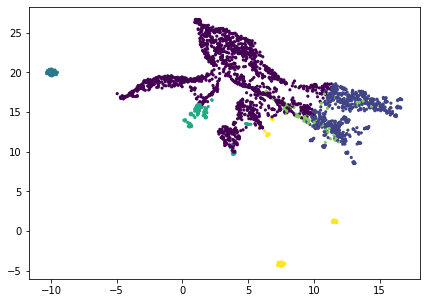

In [42]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none'
)
plt.show()